# Genrify Project - Phase II
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

# Data Loading Using Pandas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 1999
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [8]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Coldplay,Viva La Vida,0.09410,0.485,242373,0.619,0.000003,5,0.1090,-7.115,0.0289,138.017,4,0.424,alternative
1,Trails and Ways,Animal (Miike Snow Cover),0.25300,0.686,197624,0.606,0.000000,11,0.1590,-7.897,0.0539,112.107,4,0.418,alternative
2,Mumford & Sons,Little Lion Man,0.02750,0.517,245173,0.492,0.000032,5,0.0873,-8.051,0.0272,138.579,4,0.446,alternative
3,Linkin Park,Numb,0.00366,0.493,186240,0.856,0.000000,6,0.6280,-4.134,0.0384,110.097,4,0.218,alternative
4,The Naked And Famous,Punching In A Dream,0.00276,0.476,238133,0.894,0.000847,6,0.1580,-3.636,0.0469,115.053,4,0.164,alternative


# Target variable

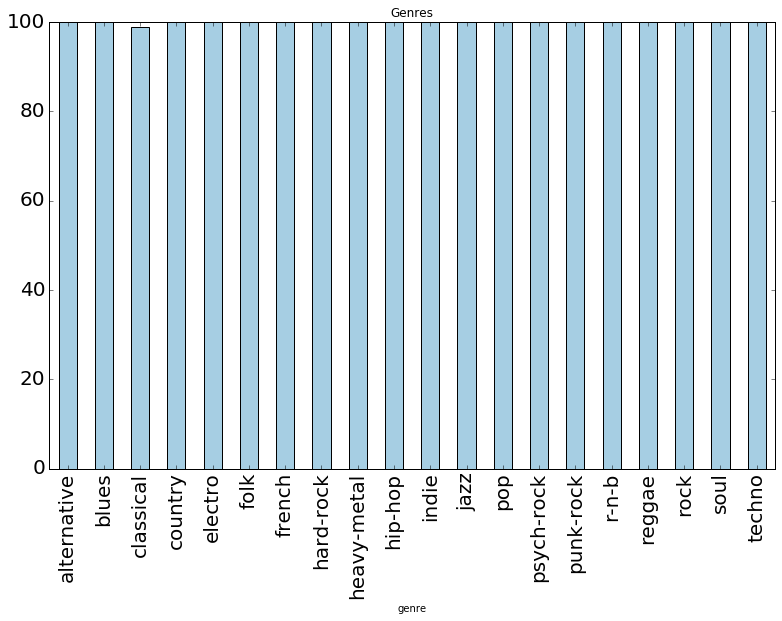

In [9]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [10]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

#Multinomial Target Variable
GENRES = ['alternative','blues','classical','country','electro','folk','french','hard-rock','heavy-metal','hip-hop','indie','jazz','pop','psych-rock','punk-rock','r-n-b','reggae','rock','soul','techno']
target_multinomial = []
for i in data['genre']:
    target_multinomial.append(GENRES.index(i))

Dimension: (1999, 20)
array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])


# Logistic Regression

In [88]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

sc_attributes = scale(attributes)
#print(repr(sc_attributes))

lr_model = LogisticRegression()
lr_acc_scores = cross_val_score(lr_model, sc_attributes, target_multinomial,cv=10)
avg_lr_acc = np.mean(lr_acc_scores)
print("Averaged Logistic Regression Accuracy: " + str(avg_lr_acc))


Averaged Logistic Regression Accuracy: 0.343173366834


# Decision Tree

In [89]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)
avg_tree_acc = np.mean(tree_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_tree_acc))


Averaged Decision Tree Accuracy: 0.253655778894
